## BERT Base-Cased Model on GoEmotions

In [1]:
# importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import tensorflow as tf
from sklearn.metrics import classification_report
from transformers import BertTokenizer, TFBertModel
from bert_model_class import BertClassificationModel # Imports the BERT model 
from TextCleaner import TextCleaner

In [2]:
from tensorflow import keras
from tensorflow.keras.layers import Input, Dense
from tensorflow.keras.models import Model

from sklearn.preprocessing import MultiLabelBinarizer

from datasets import load_dataset

In [3]:
dataset_name = "go_emotions"
dataset = load_dataset(dataset_name)
pd.set_option('display.max_colwidth', None)

# Convert to pandas dataframes
train_df = dataset["train"].to_pandas()
dev_df = dataset["validation"].to_pandas()
test_df = dataset["test"].to_pandas()

# Convert to pandas dataframes
train_df.columns = ["text", "emotions", "ids"]
dev_df.columns = ["text", "emotions", "ids"]
test_df.columns = ["text", "emotions", "ids"]

In [4]:
cleaner = TextCleaner(train_df, dev_df, test_df)
cleaner.clean_all() # Apply all cleaning steps

In [5]:
train_texts = train_df['text'].tolist()
dev_texts = dev_df['text'].tolist()
test_texts = test_df['text'].tolist()

In [6]:
len(train_df)

43410

In [7]:
train_df[:10]

,text,emotions,ids
0,my favourite food is anything i did not have to cook myself,[27],eebbqej
1,now if he does off himself everyone will think hes having a laugh screwing with people instead of actually dead,[27],ed00q6i
2,why the fuck is bayless isoing,[2],eezlygj
3,to make her feel threatened,[14],ed7ypvh
4,dirty southern wankers,[3],ed0bdzj
5,omg peyton is not good enough to help us in the playoffs dumbass broncos fans circa december 2015,[26],edvnz26
6,yes i heard about the f bombs that has to be why thanks for your reply until then hubby and i will anxiously wait 😝,[15],ee3b6wu
7,we need more boards and to create a bit more space for [NAME] then we will be good,"[8, 20]",ef4qmod
8,damn youtube and outrage drama is super lucrative for reddit,[0],ed8wbdn
9,it might be linked to the trust factor of your friend,[27],eczgv1o


In [8]:
train_labels = train_df['emotions'].tolist()
dev_labels = dev_df['emotions'].tolist()
test_labels = test_df['emotions'].tolist()

mlb = MultiLabelBinarizer()
train_labels_bin = mlb.fit_transform(train_labels)
dev_labels_bin = mlb.transform(dev_labels)
test_labels_bin = mlb.transform(test_labels)

In [9]:
train_labels_bin[:5]

array([[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 1],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 1],
       [0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0],
       [0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0]])

In [10]:
train_labels_bin.shape

(43410, 28)

In [11]:
# del dataset, train_df, dev_df, test_df

In [40]:
emotion_mapping = {
    '0' : 'admiration',
    '1' : 'amusement',
    '2' : 'anger',
    '3' : 'annoyance',
    '4' : 'approval',
    '5' : 'caring',
    '6' : 'confusion',
    '7' : 'curiosity',
    '8' : 'desire',
    '9': 'disappointment',
    '10': 'disapproval',
    '11': 'disgust',
    '12': 'embarrassment',
    '13': 'excitement',
    '14': 'fear',
    '15': 'gratitude',
    '16': 'grief',
    '17': 'joy',
    '18': 'love',
    '19': 'nervousness',
    '20': 'optimism',
    '21': 'pride',
    '22': 'realization',
    '23': 'relief',
    '24': 'remorse',
    '25': 'sadness',
    '26': 'surprise',
    '27': 'neutral'
}

target_names = list(emotion_mapping.values())
print(target_names)

['admiration', 'amusement', 'anger', 'annoyance', 'approval', 'caring', 'confusion', 'curiosity', 'desire', 'disappointment', 'disapproval', 'disgust', 'embarrassment', 'excitement', 'fear', 'gratitude', 'grief', 'joy', 'love', 'nervousness', 'optimism', 'pride', 'realization', 'relief', 'remorse', 'sadness', 'surprise', 'neutral']


In [13]:
# BERT Tokenization
model_checkpoint = 'bert-base-cased'
bert_tokenizer = BertTokenizer.from_pretrained(model_checkpoint)

In [14]:
train_texts[:5]

['my favourite food is anything i did not have to cook myself',
 'now if he does off himself everyone will think hes having a laugh screwing with people instead of actually dead',
 'why the fuck is bayless isoing',
 'to make her feel threatened',
 'dirty southern wankers']

In [15]:
max_length = 128  # max length of input sequence

train_encodings = bert_tokenizer(train_texts, truncation=True, padding='max_length', max_length=max_length, return_tensors='tf')
dev_encodings = bert_tokenizer(dev_texts, truncation=True, padding='max_length', max_length=max_length, return_tensors='tf')
test_encodings = bert_tokenizer(test_texts, truncation=True, padding='max_length', max_length=max_length, return_tensors='tf')

2023-11-19 23:14:53.949763: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-11-19 23:14:55.750880: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1532] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 8175 MB memory:  -> device: 0, name: NVIDIA A100-PCIE-40GB, pci bus id: 0000:c3:00.0, compute capability: 8.0


In [16]:
train_encodings.input_ids[1] 

<tf.Tensor: shape=(128,), dtype=int32, numpy=
array([  101,  1208,  1191,  1119,  1674,  1228,  1471,  2490,  1209,
        1341,  1119,  1116,  1515,   170,  4046, 13084,  1158,  1114,
        1234,  1939,  1104,  2140,  2044,   102,     0,     0,     0,
           0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,     0,     0,     0,   

In [17]:
#let's get a fresh instance of the bert_model -- good practice
model_checkpoint = 'bert-base-cased'
bert_classifier = BertClassificationModel(checkpoint = model_checkpoint, max_length = 128)

model = bert_classifier.model 

2023-11-19 23:15:04.996664: I tensorflow/stream_executor/cuda/cuda_blas.cc:1786] TensorFloat-32 will be used for the matrix multiplication. This will only be logged once.
Some weights of the PyTorch model were not used when initializing the TF 2.0 model TFBertModel: ['cls.predictions.transform.LayerNorm.bias', 'cls.predictions.transform.LayerNorm.weight', 'cls.predictions.transform.dense.weight', 'cls.predictions.transform.dense.bias', 'cls.predictions.bias', 'cls.seq_relationship.weight', 'cls.seq_relationship.bias']
- This IS expected if you are initializing TFBertModel from a PyTorch model trained on another task or with another architecture (e.g. initializing a TFBertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing TFBertModel from a PyTorch model that you expect to be exactly identical (e.g. initializing a TFBertForSequenceClassification model from a BertForSequenceClassification model).
All the weights of TFBertModel

In [18]:
# confirm all layers are frozen
model.summary() 

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 attention_mask_layer (InputLay  [(None, 128)]       0           []                               
 er)                                                                                              
                                                                                                  
 input_ids_layer (InputLayer)   [(None, 128)]        0           []                               
                                                                                                  
 token_type_ids_layer (InputLay  [(None, 128)]       0           []                               
 er)                                                                                              
                                                                                              

In [19]:
# keras.utils.plot_model(bert_classification_model, show_shapes=True, dpi=90)

In [22]:
bert_classification_model_history = model.fit(
    [train_encodings.input_ids, train_encodings.token_type_ids, train_encodings.attention_mask],
        train_labels_bin,  # Using binarized labels
    validation_data=(
        [dev_encodings.input_ids, dev_encodings.token_type_ids, dev_encodings.attention_mask],
        dev_labels_bin  # Using binarized labels
    ),
    batch_size=16,
    epochs=4
)

Epoch 1/4
2714/2714 [==============================] - 716s 264ms/step - loss: 0.0764 - accuracy: 0.6121 - val_loss: 0.0864 - val_accuracy: 0.5706
Epoch 2/4
2714/2714 [==============================] - 722s 266ms/step - loss: 0.0635 - accuracy: 0.6772 - val_loss: 0.0907 - val_accuracy: 0.5534
Epoch 3/4
2714/2714 [==============================] - 717s 264ms/step - loss: 0.0491 - accuracy: 0.7543 - val_loss: 0.1036 - val_accuracy: 0.5433
Epoch 4/4
2714/2714 [==============================] - 716s 264ms/step - loss: 0.0371 - accuracy: 0.8115 - val_loss: 0.1194 - val_accuracy: 0.5236


In [23]:
 # test the model on the test set and print the neccessary results
score = model.evaluate([test_encodings.input_ids, test_encodings.token_type_ids, test_encodings.attention_mask],
                                                  test_labels_bin)

print('Test loss:', score[0])
print('Test accuracy:', score[1])

170/170 [==============================] - 33s 195ms/step - loss: 0.1174 - accuracy: 0.5357
Test loss: 0.11742039769887924
Test accuracy: 0.5356550812721252


In [24]:
# run predict for the first three elements in the test data set
# predictions = model.predict([test_encodings.input_ids[:3], test_encodings.token_type_ids[:3], test_encodings.attention_mask[:3]])

In [25]:
#run and capture all predictions from our test set using model.predict
predictions_model1 = model.predict([test_encodings.input_ids, test_encodings.token_type_ids, test_encodings.attention_mask])

threshold = 0.3
binary_predictions = (predictions_model1 > threshold).astype(int)

170/170 [==============================] - 35s 192ms/step


In [26]:
print(classification_report(test_labels_bin, binary_predictions, target_names=target_names))

                precision    recall  f1-score   support

    admiration       0.66      0.62      0.64       504
     amusement       0.78      0.77      0.78       264
         anger       0.62      0.35      0.45       198
     annoyance       0.34      0.32      0.33       320
      approval       0.50      0.26      0.35       351
        caring       0.54      0.28      0.37       135
     confusion       0.43      0.37      0.40       153
     curiosity       0.53      0.23      0.32       284
        desire       0.60      0.30      0.40        83
disappointment       0.44      0.20      0.27       151
   disapproval       0.43      0.23      0.30       267
       disgust       0.55      0.44      0.49       123
 embarrassment       0.71      0.27      0.39        37
    excitement       0.64      0.27      0.38       103
          fear       0.72      0.65      0.68        78
     gratitude       0.92      0.89      0.90       352
         grief       0.00      0.00      0.00  

/global/common/software/nersc/pm-2022q4/sw/tensorflow/2.9.0/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [27]:
# Decode binary predictions to get emotion labels
test_pred_labels = mlb.inverse_transform(binary_predictions) 

In [28]:
# print first 5 examples
for i in range(40):
    text_example = test_texts[i]
    actual_emotion = test_df['emotions'].iloc[i]
    
    actual_labels = [emotion_mapping[str(label)] for label in actual_emotion]
    predicted_labels = [emotion_mapping[str(label)] for label in test_pred_labels[i]]

    print(f"Text: {text_example}")
    print(f"Actual Labels: {actual_labels}")
    print(f"Predicted Labels: {predicted_labels}")
    print("\n" + "="*50 + "\n")

Text: i am really sorry about your situation although i love the names sapphira cirilla and scarlett
Actual Labels: ['sadness']
Predicted Labels: ['remorse']


Text: it is wonderful because it is awful at not with
Actual Labels: ['admiration']
Predicted Labels: ['disgust']


Text: kings fan here good luck to you guys will be an interesting game to watch
Actual Labels: ['excitement']
Predicted Labels: ['admiration', 'optimism']


Text: i did not know that thank you for teaching me something today
Actual Labels: ['gratitude']
Predicted Labels: ['gratitude']


Text: they got bored from haunting earth for thousands of years and ultimately moved on to the afterlife
Actual Labels: ['neutral']
Predicted Labels: ['neutral']


Text: thank you for asking questions and recognizing that there may be things that you do not know or understand about police tactics seriously thank you
Actual Labels: ['gratitude']
Predicted Labels: ['gratitude']


Text: you are welcome
Actual Labels: ['gratitude']
Pred

## Table with Results from Out of the Box BERT-base Cased

| Model Name   | Max length | Hidden Units | Dropout | Learning Rate | Batch Size | Num. Epochs | Evaluation Data | Accuracy | Macro F1 Score | Precision | Recall | Total Parameters |
|--------------|------------|--------------|---------|---------------|------------|------------|-----------------|----------|----------------|-----------|--------|------------------|
| BERT-base    | 128        | N/A          | 0.1     | 0.00005       | 16         | 4          | Test Data       | -        | 0.43           | 0.63      | 0.46   | 108,331,804      |


## Table with Results After Cleaning the Dataset with BERT-base Cased

| Model Name   | Max length | Hidden Units | Dropout | Learning Rate | Batch Size | Num. Epochs | Evaluation Data | Accuracy | Macro F1 Score | Precision | Recall | Total Parameters |
|--------------|------------|--------------|---------|---------------|------------|------------|-----------------|----------|----------------|-----------|--------|------------------|
| BERT-base    | 128        | N/A          | 0.1     | 0.00005       | 16         | 4          | Test Data       | -        | 0.58           | 0.41      | 0.46   | 108,331,804      |

## Grouped Taxonomy of Emotions 

In [29]:
mapping = {
"positive": ["amusement", "excitement", "joy", "love", "desire", "optimism", "caring", "pride", "admiration", "gratitude", "relief", "approval"],
"negative": ["fear", "nervousness", "remorse", "embarrassment", "disappointment", "sadness", "grief", "disgust", "anger", "annoyance", "disapproval"],
"ambiguous": ["realization", "surprise", "curiosity", "confusion"]
}

## Saving the model and tokenizer

In [30]:
# # Save model and tokenizer
# model.save('BERT-base Cased')

In [31]:
# bert_tokenizer.save_pretrained('BERT-base Cased')

In [32]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

<Figure size 1000x1000 with 0 Axes>

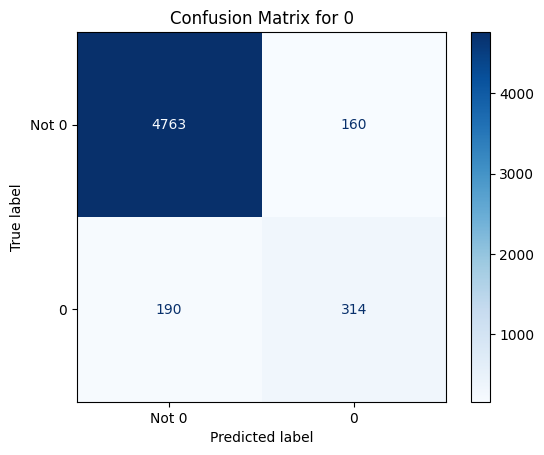

<Figure size 1000x1000 with 0 Axes>

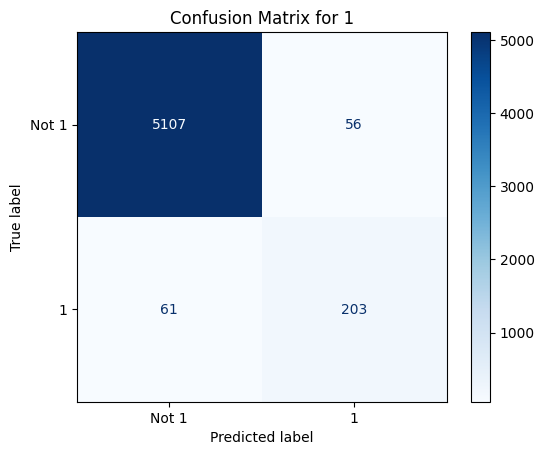

<Figure size 1000x1000 with 0 Axes>

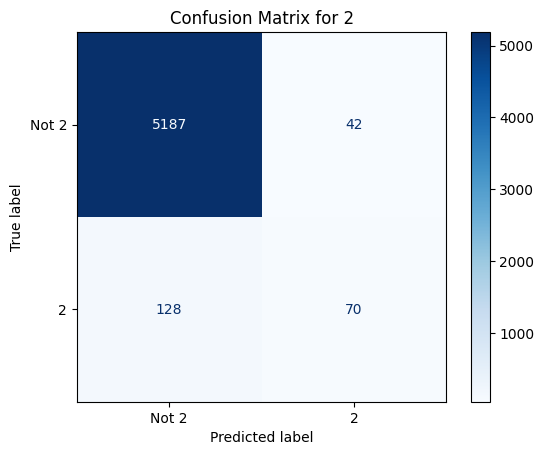

<Figure size 1000x1000 with 0 Axes>

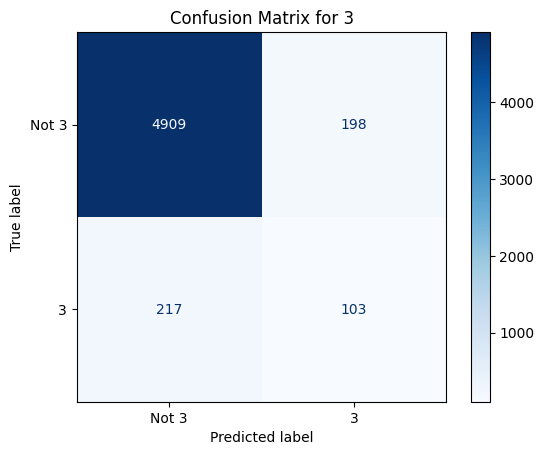

<Figure size 1000x1000 with 0 Axes>

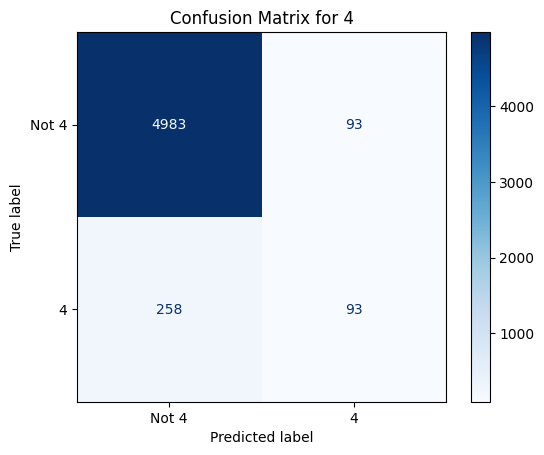

<Figure size 1000x1000 with 0 Axes>

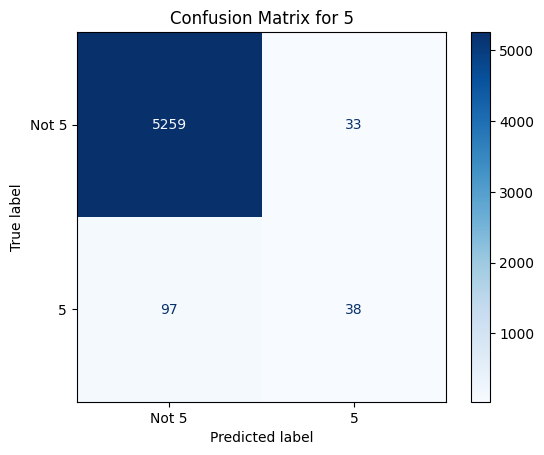

<Figure size 1000x1000 with 0 Axes>

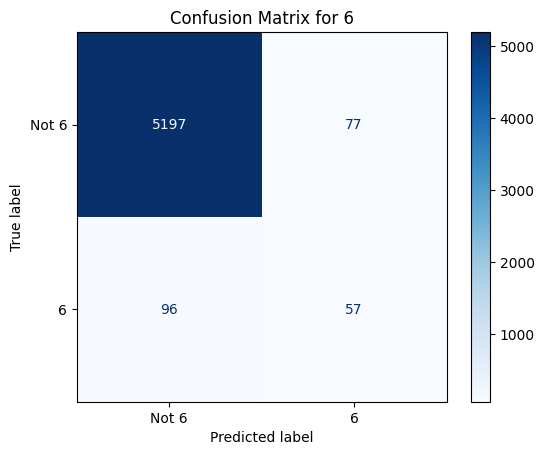

<Figure size 1000x1000 with 0 Axes>

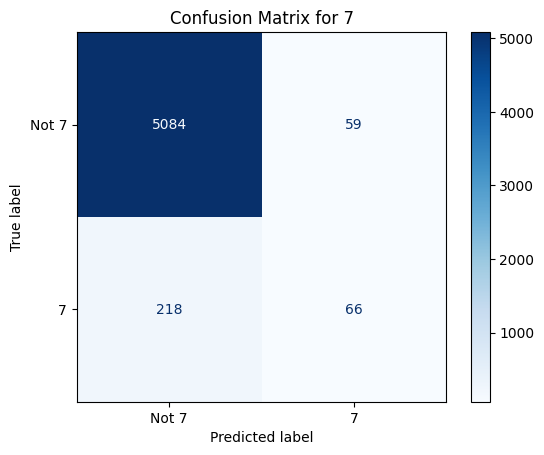

<Figure size 1000x1000 with 0 Axes>

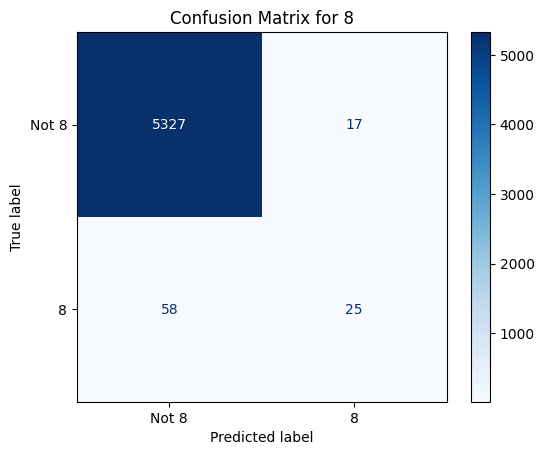

<Figure size 1000x1000 with 0 Axes>

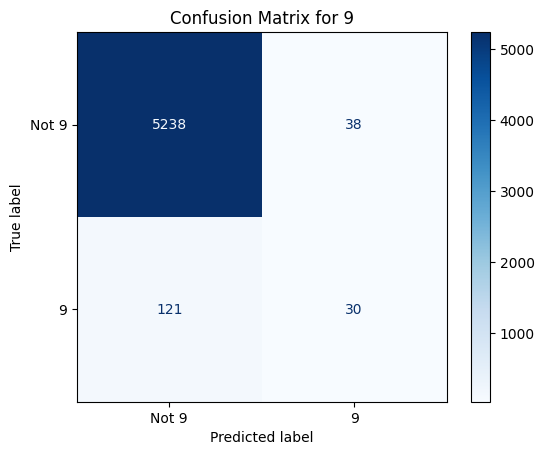

<Figure size 1000x1000 with 0 Axes>

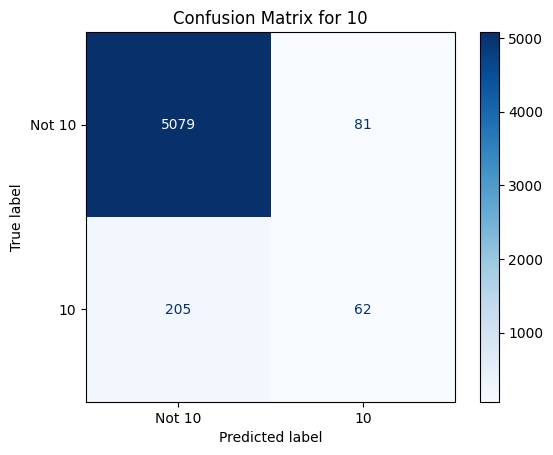

<Figure size 1000x1000 with 0 Axes>

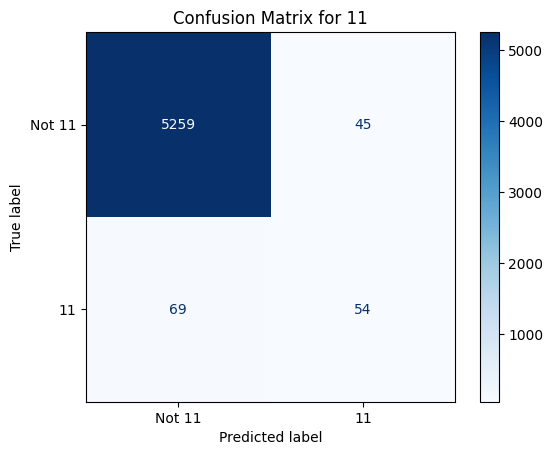

<Figure size 1000x1000 with 0 Axes>

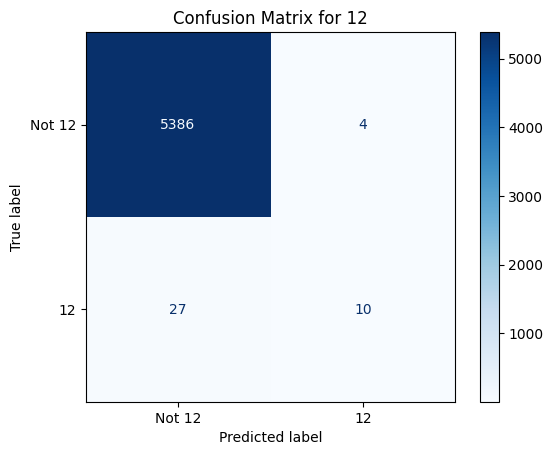

<Figure size 1000x1000 with 0 Axes>

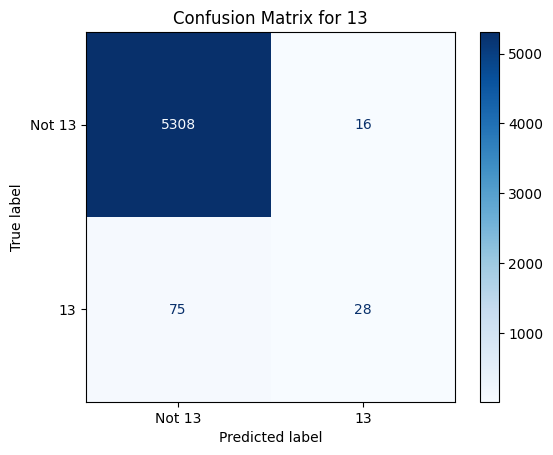

<Figure size 1000x1000 with 0 Axes>

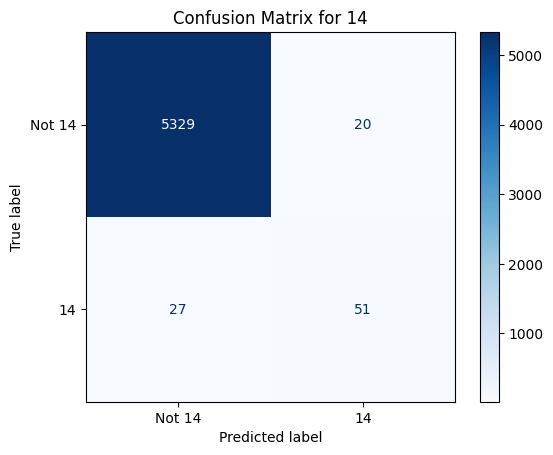

<Figure size 1000x1000 with 0 Axes>

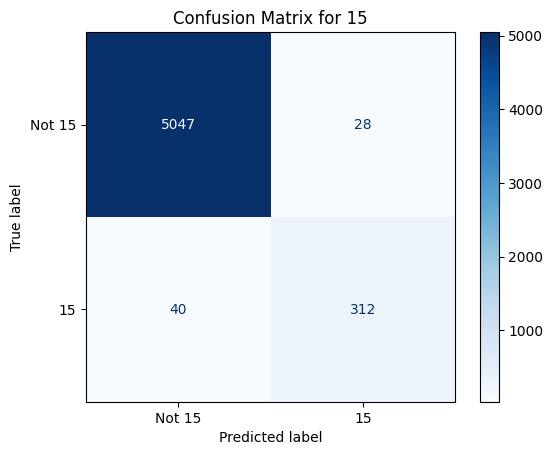

<Figure size 1000x1000 with 0 Axes>

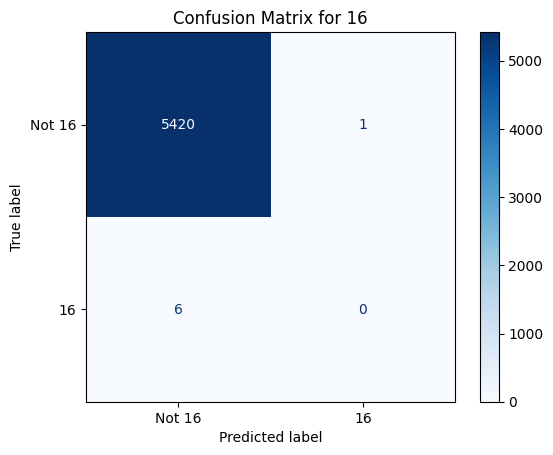

<Figure size 1000x1000 with 0 Axes>

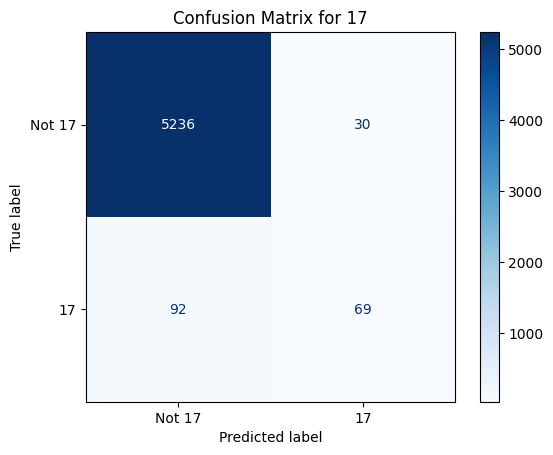

<Figure size 1000x1000 with 0 Axes>

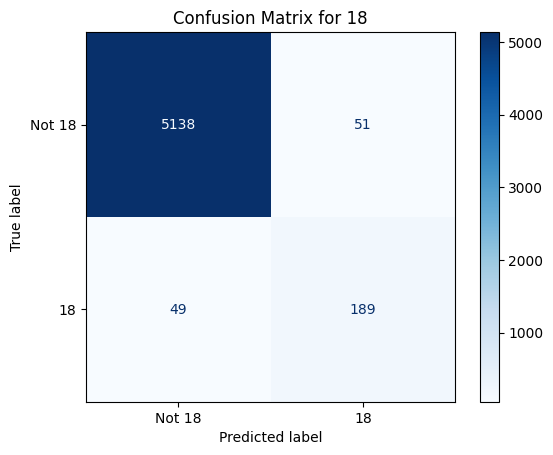

<Figure size 1000x1000 with 0 Axes>

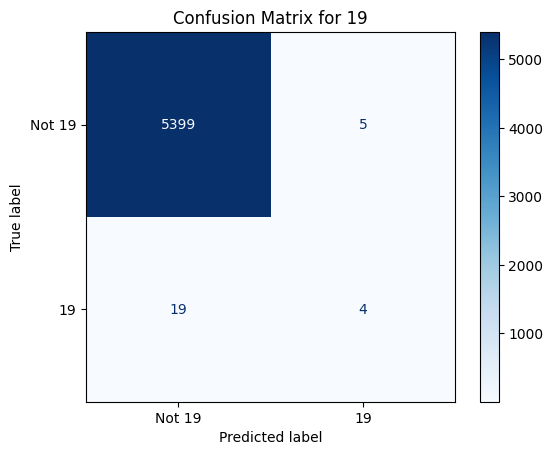

<Figure size 1000x1000 with 0 Axes>

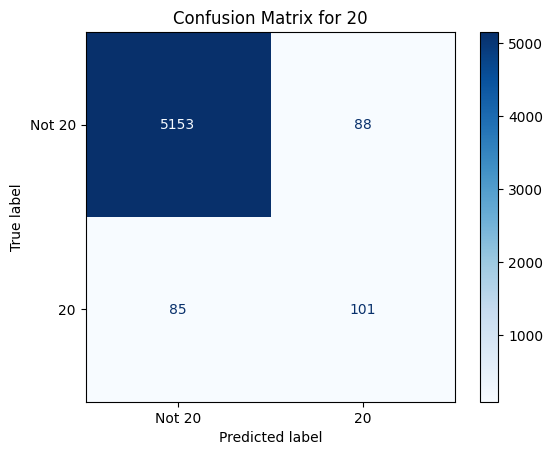

<Figure size 1000x1000 with 0 Axes>

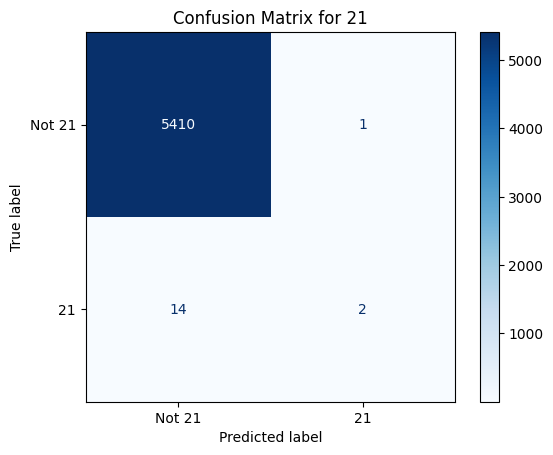

<Figure size 1000x1000 with 0 Axes>

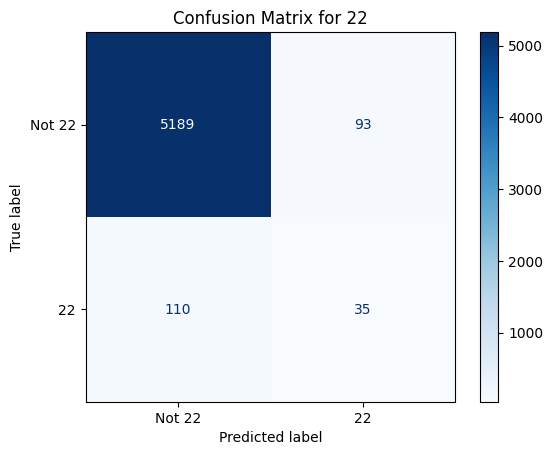

<Figure size 1000x1000 with 0 Axes>

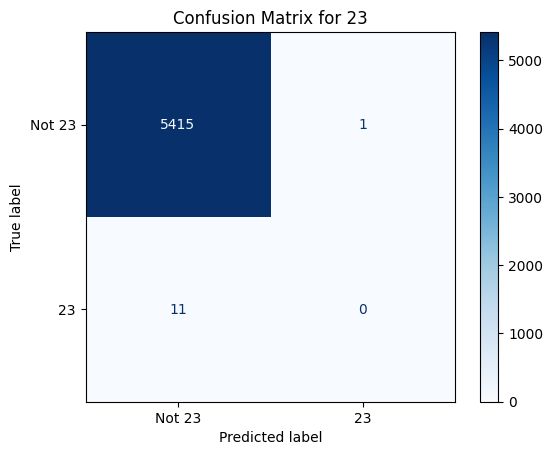

<Figure size 1000x1000 with 0 Axes>

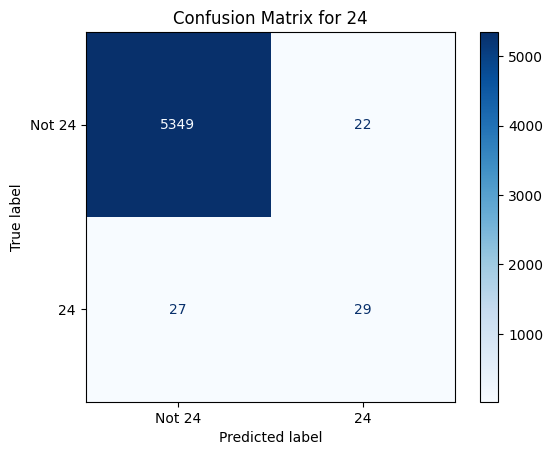

<Figure size 1000x1000 with 0 Axes>

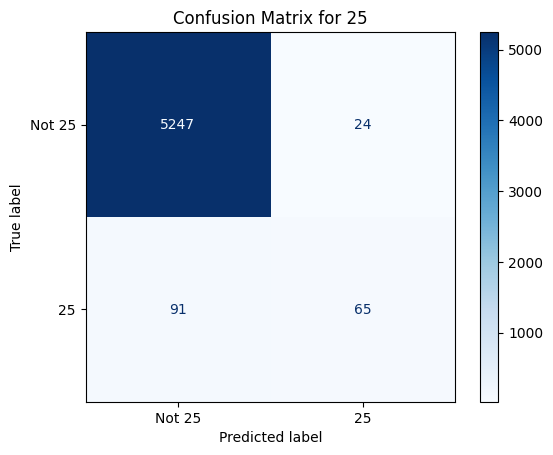

<Figure size 1000x1000 with 0 Axes>

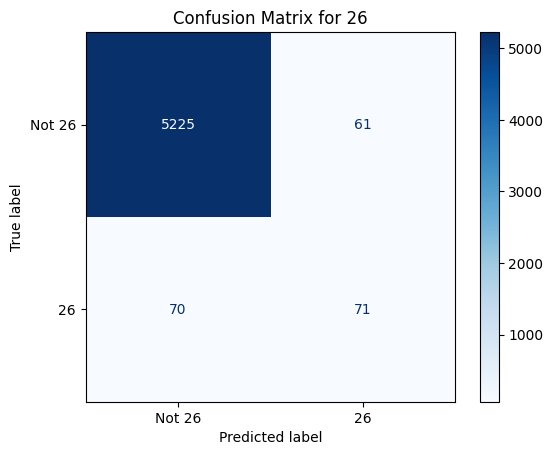

<Figure size 1000x1000 with 0 Axes>

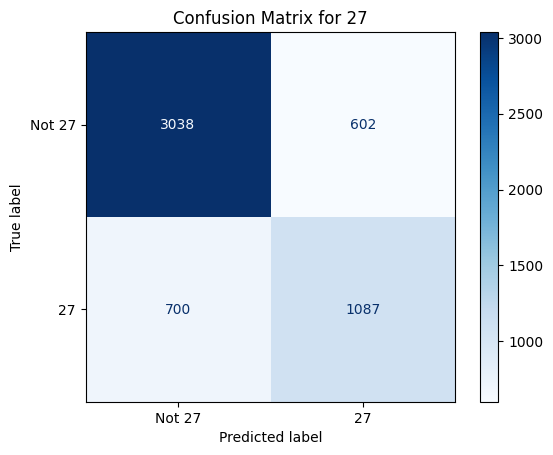

In [35]:
num_labels = len(mlb.classes_)
for i in range(num_labels):
    cm = confusion_matrix(test_labels_bin[:, i], binary_predictions[:, i])
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=[f'Not {mlb.classes_[i]}', mlb.classes_[i]])

    plt.figure(figsize=(10,10))
    disp.plot(cmap=plt.cm.Blues)
    plt.title(f'Confusion Matrix for {mlb.classes_[i]}')
    plt.show()


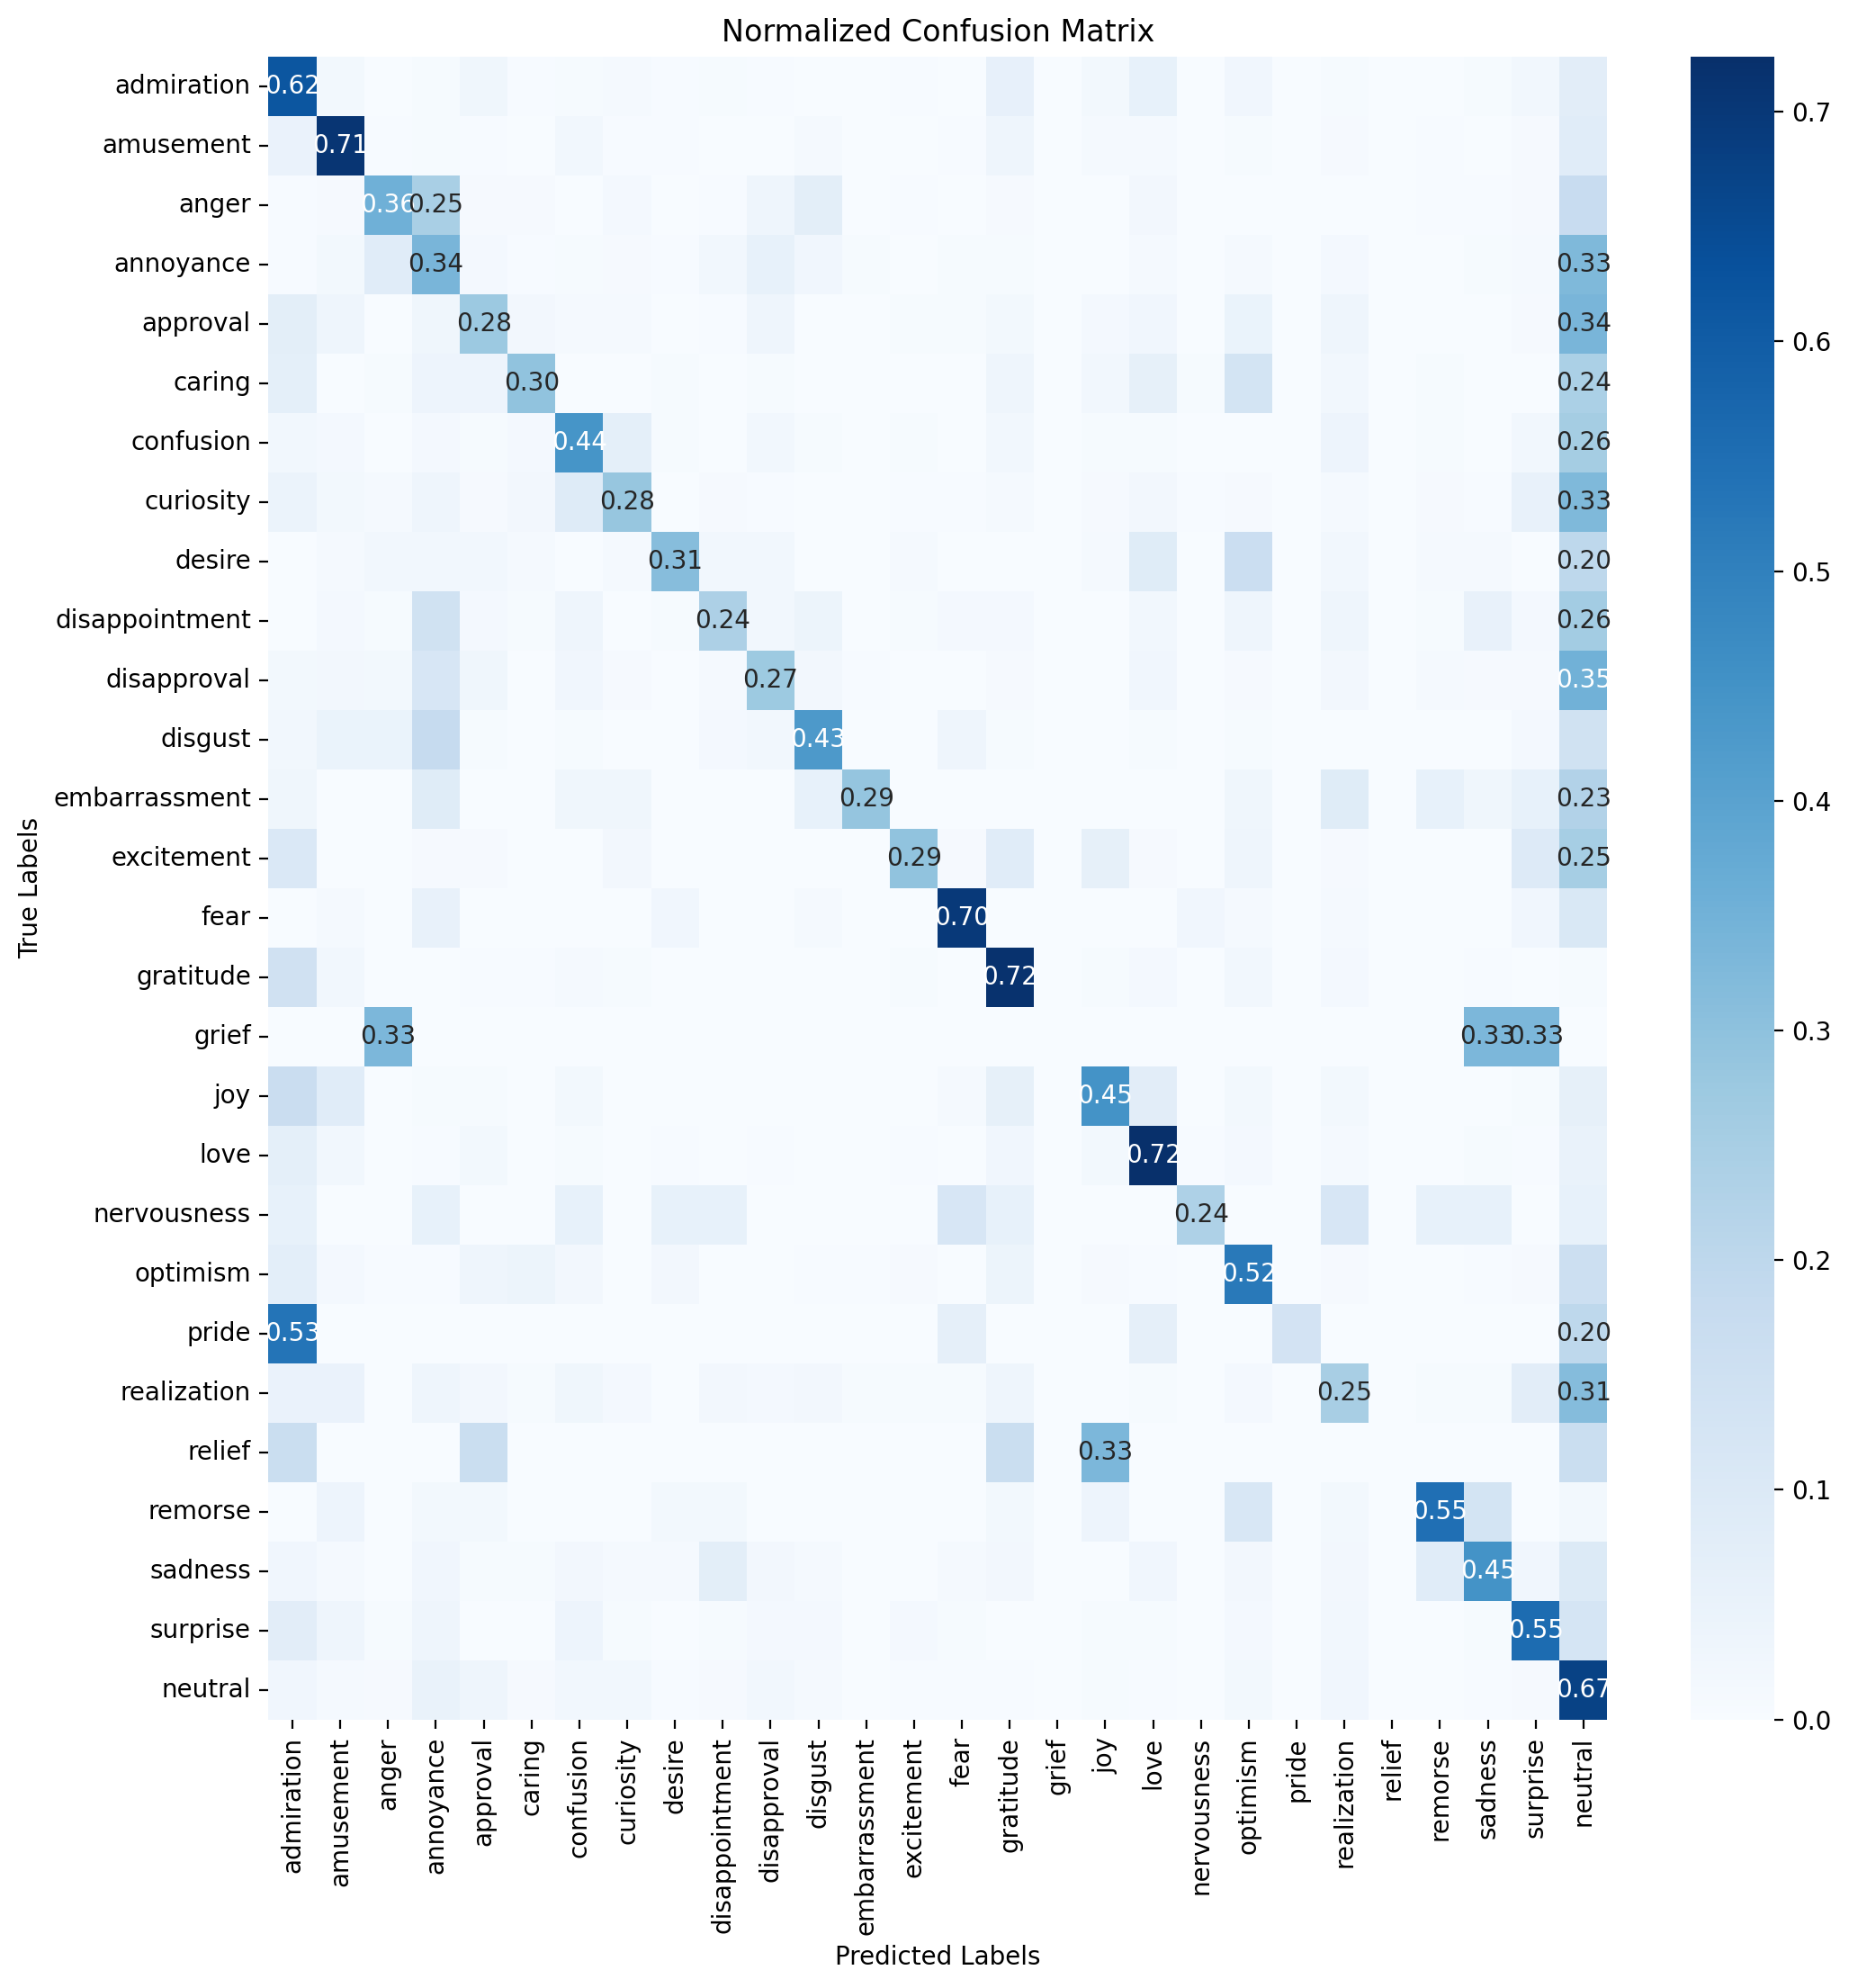

In [54]:
num_classes = 28  # Number of labels

# Initialize the confusion matrix
conf_matrix = np.zeros((num_classes, num_classes), dtype=np.int32)

# Update the matrix for each sample
for true_labels, pred_labels in zip(test_labels_bin, binary_predictions):
    for i in range(num_classes):
        if true_labels[i]:
            for j in range(num_classes):
                if pred_labels[j]:
                    conf_matrix[i, j] += 1

# Normalize the matrix
conf_matrix_normalized = conf_matrix / conf_matrix.sum(axis=1, keepdims=True)

# only keeping the values after normalizaiton which ae greater than 0.20
annotations = np.array([["" if value < 0.20 else f"{value:.2f}" for value in row] for row in conf_matrix_normalized])

# Plot the matrix
plt.figure(figsize=(12, 12), dpi=200)
sns.heatmap(conf_matrix_normalized, annot=annotations, fmt="", cmap="Blues", xticklabels=target_names, yticklabels=target_names)
plt.ylabel('True Labels')
plt.xlabel('Predicted Labels')
plt.title('Normalized Confusion Matrix')
plt.xticks(rotation=90)
plt.yticks(rotation=0)
plt.show()


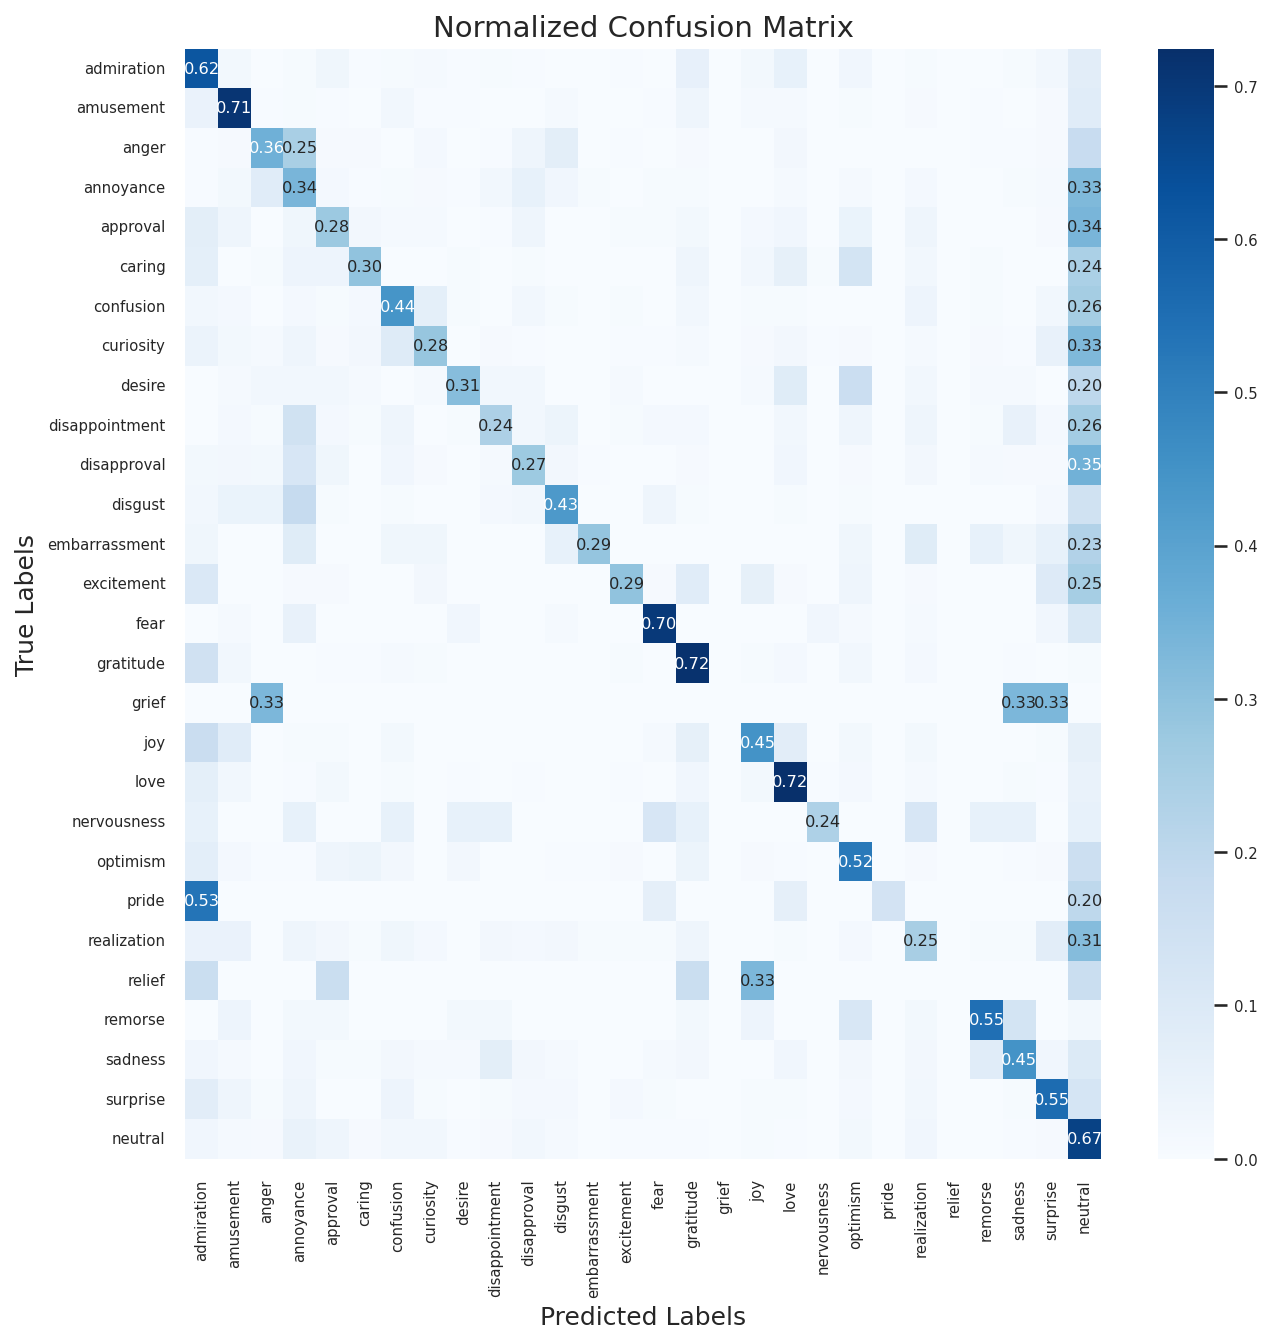

In [65]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

num_classes = 28  # Number of labels

# Initialize the confusion matrix
conf_matrix = np.zeros((num_classes, num_classes), dtype=np.int32)

# Update the matrix for each sample
for true_labels, pred_labels in zip(test_labels_bin, binary_predictions):
    for i in range(num_classes):
        if true_labels[i]:
            for j in range(num_classes):
                if pred_labels[j]:
                    conf_matrix[i, j] += 1

# Normalize the matrix
conf_matrix_normalized = conf_matrix / conf_matrix.sum(axis=1, keepdims=True)

# Create a custom annotation array
annotations = np.array([["" if value < 0.20 else f"{value:.2f}" for value in row] for row in conf_matrix_normalized])

# Set a smaller figure size
plt.figure(figsize=(9, 9), dpi=150)

# Set font scale
sns.set(font_scale=0.65)

# Plot the matrix
ax = sns.heatmap(conf_matrix_normalized, annot=annotations, fmt="", cmap="Blues", xticklabels=target_names, yticklabels=target_names)
plt.ylabel('True Labels', fontsize=12)
plt.xlabel('Predicted Labels', fontsize=12)
plt.title('Normalized Confusion Matrix', fontsize=14)

# Rotate the labels for better visibility
plt.xticks(rotation=90)
plt.yticks(rotation=0)

# Adjust layout to fit everything
plt.tight_layout()

# Display the plot
plt.show()

# Reset font scale to default for other plots
sns.reset_orig()
